In [1]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import wget
import os.path

DATASET_URL = 'https://drive.google.com/uc?export=download&id=1oBOg3EVwyL10KfKidDD1CsweNZP7BOeL'
DATASET_PATH = 'data/toxicCommentsFull.csv'

if not os.path.isfile(DATASET_PATH):
    wget.download(DATASET_URL, DATASET_PATH)

In [3]:
df = pd.read_csv("data/toxicCommentsFull.csv")

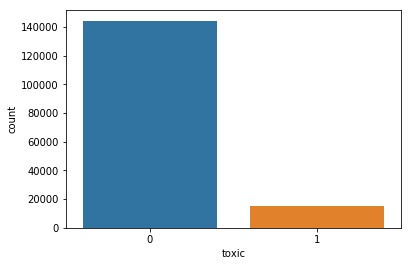

In [6]:
import seaborn as sns
sns.countplot(x='', data=df)

In [7]:
import nltk
from nltk.corpus import stopwords

# nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [8]:
from nltk.probability import FreqDist

comments = df["comment_text"]
print(comments[:10])

stops_eng = stopwords.words('english')
fd = FreqDist()

# TODO fill fd

vocab = fd.keys()
print(len(vocab))
print(fd.most_common(20))

0    Explanation\nWhy the edits made under my usern...
1    D'aww! He matches this background colour I'm s...
2    Hey man, I'm really not trying to edit war. It...
3    "\nMore\nI can't make any real suggestions on ...
4    You, sir, are my hero. Any chance you remember...
5    "\n\nCongratulations from me as well, use the ...
6         COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK
7    Your vandalism to the Matt Shirvington article...
8    Sorry if the word 'nonsense' was offensive to ...
9    alignment on this subject and which are contra...
Name: comment_text, dtype: object
122977
[('article', 37883), ('would', 28798), ('page', 27582), ('like', 26219), ('one', 24236), ('please', 24072), ('talk', 22306), ('wikipedia', 20682), ('think', 18877), ('see', 18363), ('know', 16341), ('also', 16003), ('may', 15150), ('edit', 15018), ('people', 14879), ('use', 14424), ('get', 12979), ('even', 12833), ('make', 12571), ('could', 11372)]


<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

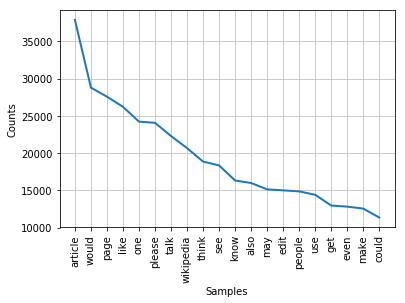

In [9]:
plt.figure(figsize=(16,5))
fd.plot(20)

In [10]:
labels = df["toxic"]
print(labels[:10])

0    0
1    0
2    0
3    0
4    0
5    0
6    1
7    0
8    0
9    0
Name: toxic, dtype: int64


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2500, stop_words=stopwords.words('english'), lowercase=True)  
features = vectorizer.fit_transform(comments).toarray()
print(features)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, stratify = labels, 
                                                    test_size=0.2, random_state=0) 

In [13]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

cf = confusion_matrix(y_test,predictions)
print(cf)

[[21830  7026]
 [  496  2563]]


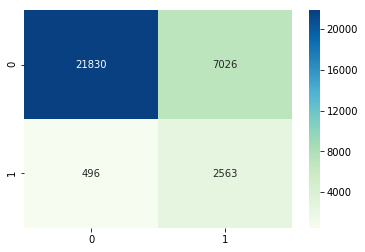

In [15]:
sns.heatmap(cf, cmap="GnBu", annot=True, fmt='g');

In [16]:
accuracy_score(y_test, predictions) 

0.7643114522951591

In [17]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.76      0.85     28856
           1       0.27      0.84      0.41      3059

    accuracy                           0.76     31915
   macro avg       0.62      0.80      0.63     31915
weighted avg       0.91      0.76      0.81     31915



In [18]:
# Process user input. Processing continues until the user says goodbye. 
text = ""
while text != "exit":
    # Read user input
    text = input()
    test_features = vectorizer.transform([text]).toarray()  
    print('offensive comment' if clf.predict(test_features) == 1 else 'Not Offensive')

KeyboardInterrupt: 

***Add new column that merge all the label - offensive***

In [19]:
df['offensive']  = ((df['toxic'] == 1) | 
                    (df['severe_toxic'] == 1) |  
                    (df['obscene'] == 1) |  
                    (df['threat'] == 1) | 
                    (df['insult'] == 1) |  
                    (df['identity_hate'] == 1)).astype(int)

In [20]:
labels_set = [df.loc[df['toxic'] == 1].id.count(), 
              df.loc[df['severe_toxic'] == 1].id.count(), 
              df.loc[df['obscene'] == 1].id.count(), 
              df.loc[df['threat'] == 1].id.count(), 
              df.loc[df['insult'] == 1].id.count(), 
              df.loc[df['identity_hate'] == 1].id.count(),
              df.loc[df['offensive'] == 1].id.count()]

In [21]:
labels_unset = [df.loc[df['toxic'] == 0].id.count(), 
                df.loc[df['severe_toxic'] == 0].id.count(), 
                df.loc[df['obscene'] == 0].id.count(), 
                df.loc[df['threat'] == 0].id.count(), 
                df.loc[df['insult'] == 0].id.count(), 
                df.loc[df['identity_hate'] == 0].id.count(),
                df.loc[df['offensive'] == 0].id.count()]

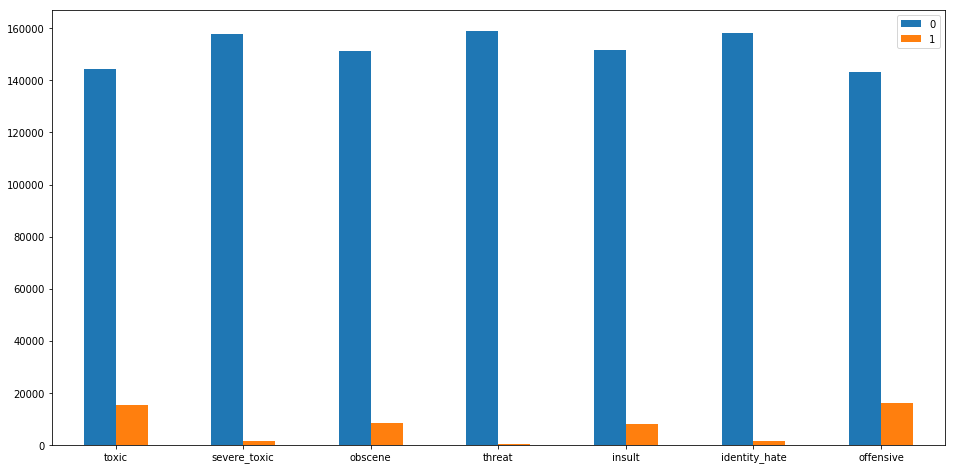

In [22]:
index = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'offensive']
df1 = pd.DataFrame({'0': labels_unset, '1': labels_set}, index=index)
ax = df1.plot.bar(rot=0, figsize=(16,8))

***Frequent term available in offensive terms***

6          COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK
12    Hey... what is it..\n@ | talk .\nWhat is it......
16    Bye! \n\nDon't look, come or think of comming ...
42    You are gay or antisemmitian? \n\nArchangel WH...
43             FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!
44    I'm Sorry \n\nI'm sorry I screwed around with ...
51    GET FUCKED UP. GET FUCKEEED UP.  GOT A DRINK T...
55    Stupid peace of shit stop deleting my stuff as...
56    =Tony Sidaway is obviously a fistfuckee. He lo...
58    My Band Page's deletion. You thought I was gon...
Name: comment_text, dtype: object
26429
[('fuck', 7873), ('like', 3630), ('nigger', 3193), ('fucking', 3178), ('suck', 2844), ('go', 2673), ('shit', 2671), ('hate', 2605), ('u', 2383), ('wikipedia', 2333), ('get', 2323), ('know', 2153), ('fat', 1942), ('people', 1705), ('moron', 1700), ('faggot', 1670), ('gay', 1666), ('die', 1658), ('ass', 1627), ('hi', 1586)]


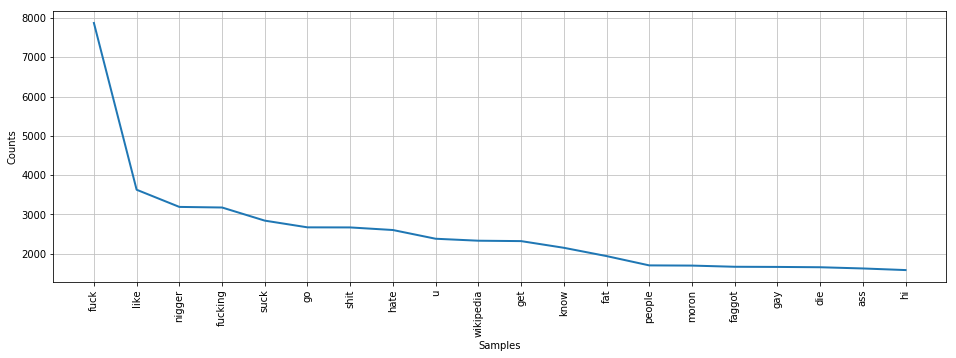

In [23]:
from nltk.probability import FreqDist

offensive_comments = df.loc[(df['offensive'] == 1)].comment_text
print(offensive_comments[:10])

stops_eng = stopwords.words('english')
fd = FreqDist()
for comment in offensive_comments:
    words = comment.split(" ")
    for word in words:
        if word.lower() not in stops_eng:
            if word.isalpha():
                fd[word.lower()] += 1
vocab = fd.keys()
print(len(vocab))
print(fd.most_common(20))
plt.figure(figsize=(16,5))
fd.plot(20)

In [24]:
labels = ((df['toxic'] == 1) | 
          (df['severe_toxic'] == 1) | 
          (df['obscene'] == 1) |  
          (df['threat'] == 1) | 
          (df['insult'] == 1) |  
          (df['identity_hate'] == 1)).astype(int)

print(labels[:10])

0    0
1    0
2    0
3    0
4    0
5    0
6    1
7    0
8    0
9    0
dtype: int64


In [25]:
vectorizer = TfidfVectorizer(max_features=2500, stop_words=stopwords.words('english'), lowercase=True)  
features = vectorizer.fit_transform(comments).toarray()
print(features)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [27]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
features_res, labels_res = rus.fit_resample(features, labels)

/usr/local/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [28]:
from collections import Counter
labels_res_cnt = Counter(labels_res)

print('Number of offensive comments available : %s' %labels_res_cnt[1])
print('Number of non-offensive comments available: %s' %labels_res_cnt[0])

Number of offensive comments available : 16225
Number of non-offensive comments available: 16225


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_res, labels_res, stratify = labels_res,
                                                    test_size=0.2, random_state=42) 

In [30]:
y_train_cnt = Counter(y_train)

print('Number of offensive comments available in training data : %s' %y_train_cnt[1])
print('Number of non-offensive comments available in training data : %s' %y_train_cnt[0])

Number of offensive comments available in training data : 12980
Number of non-offensive comments available in training data : 12980


In [31]:
y_test_cnt = Counter(y_test)

print('Number of offensive comments available in test data : %s' %y_test_cnt[1])
print('Number of non-offensive comments available in test data : %s' %y_test_cnt[0])

Number of offensive comments available in test data : 3245
Number of non-offensive comments available in test data : 3245


In [32]:
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression(solver="lbfgs")  
clf_lr.fit(X_train, y_train)

predictions_lr = clf.predict(X_test)


In [219]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

confusion_lr = confusion_matrix(y_test,predictions_lr)
print(confusion_lr)

[[3236    9]
 [ 346 2899]]


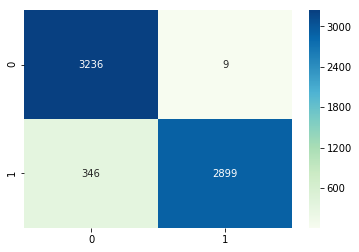

In [230]:
sns.heatmap(confusion_lr, cmap="GnBu", annot=True, fmt='g')

In [221]:
accuracy_score(y_test, predictions_lr)

0.9453004622496148

In [225]:
print(classification_report(y_test,predictions_lr))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3245
           1       1.00      0.89      0.94      3245

   micro avg       0.95      0.95      0.95      6490
   macro avg       0.95      0.95      0.95      6490
weighted avg       0.95      0.95      0.95      6490



In [231]:
# Process user input. Processing continues until the user says goodbye. 
text = ""
while text != "exit":
    # Read user input
    text = input()
    test_features = vectorizer.transform([text]).toarray()  
    print('offensive comment' if clf_lr.predict(test_features) == 1 else 'Not Offensive')


what the fuck?
offensive comment
fuck
offensive comment
You should not use the word fuck in this forum
offensive comment
exit
Not Offensive
